### Decision Tree Classifier

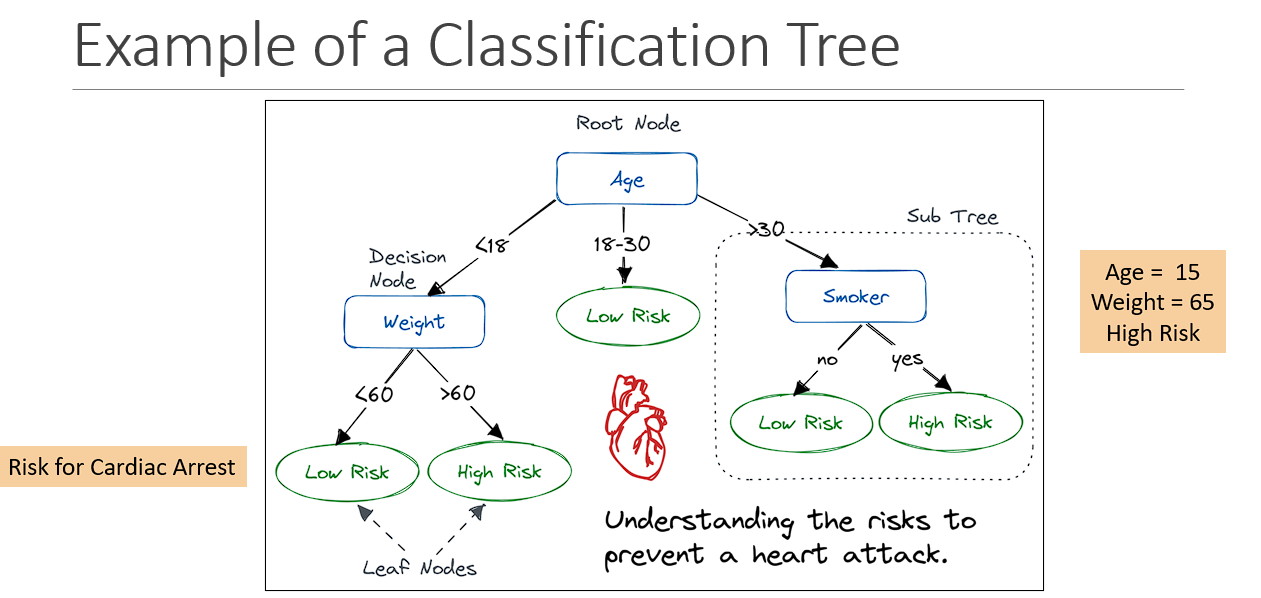

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Step 1 - Read the Train dataset

In [2]:
import pandas as pd 
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Step 2 : Perform Basic Data Quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.duplicated().sum()

1

### Step 3: Seperate X and Y(species)

In [6]:
X = df.drop(columns=['species'])
Y = df[['species']]

In [7]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [9]:
Y.value_counts()

species   
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='species'>

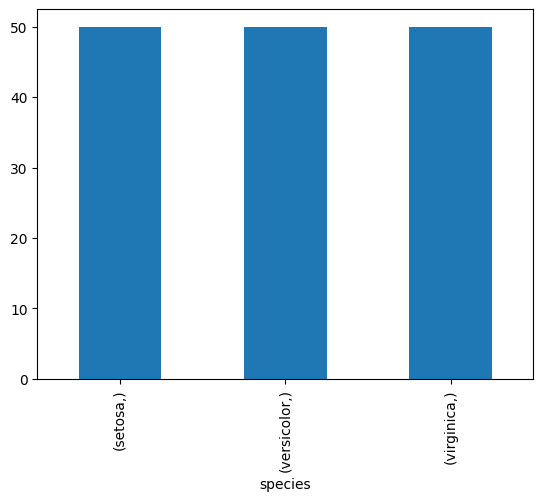

In [10]:
Y.value_counts().plot(kind='bar')

### Step 4: Perform Preprocessing on X

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler

In [12]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [13]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### Step 5: Perform Train test split

In [14]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.33, random_state=42)

In [15]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
96,-0.173674,-0.362176,0.251221,0.132510
105,2.128516,-0.131979,1.615320,1.185567
66,-0.294842,-0.131979,0.421734,0.395774
0,-0.900681,1.019004,-1.340227,-1.315444
122,2.249683,-0.592373,1.672157,1.053935


In [16]:
ytrain.head()

,species
96,versicolor
105,virginica
66,versicolor
0,setosa
122,virginica


In [17]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
73,0.310998,-0.592373,0.535409,0.000878
18,-0.173674,1.709595,-1.169714,-1.183812
118,2.249683,-1.052767,1.785832,1.448832
78,0.189830,-0.362176,0.421734,0.395774
76,1.159173,-0.592373,0.592246,0.264142


In [18]:
ytest.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


### Step 6: Build and Tune decision tree
1.max_depth

2.min_samples_split

3.min_samples_leaf

4.criterion - gini, entropy

In [19]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=1,
                               min_samples_leaf=5,
                               min_samples_split=5,
                               criterion='entropy')
model.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=5,
                       min_samples_split=5)

In [20]:
model.score(xtrain, ytrain)

0.66

In [21]:
model.score(xtest, ytest)

0.68

### Hyperparameter tuning the model with gridsearch cv

In [22]:
params = {'max_depth':[2, 3, 4, 5, 6],
          'min_samples_split':[3, 4, 5, 6, 7],
          'min_samples_leaf':[3, 4, 5, 6, 7],
          'criterion':['gini', 'entropy']}

In [23]:
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier()
gscv = GridSearchCV(dtc, param_grid=params, cv=5, scoring='f1_macro')
gscv.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [3, 4, 5, 6, 7],
                         'min_samples_split': [3, 4, 5, 6, 7]},
             scoring='f1_macro')

In [24]:
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 3}

In [25]:
gscv.best_score_

0.9223826173826174

In [26]:
best_dtc = gscv.best_estimator_
best_dtc

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=3)

### Evaluate tuned model

In [27]:
best_dtc.score(xtrain, ytrain)

0.96

In [28]:
best_dtc.score(xtest, ytest)

1.0

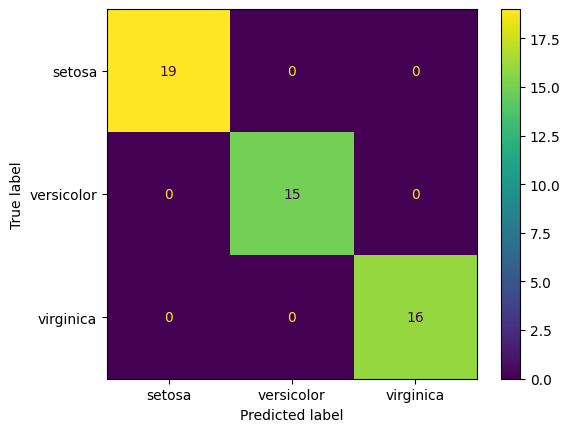

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_dtc, xtest, ytest)

In [30]:
ypred_train = best_dtc.predict(xtrain)
ypred_test = best_dtc.predict(xtest)

In [31]:
ypred_train[0:5]

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica'],
      dtype=object)

In [32]:
ytrain.head()

,species
96,versicolor
105,virginica
66,versicolor
0,setosa
122,virginica


In [33]:
ypred_test[0:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

In [34]:
ytest.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


In [35]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [36]:
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(best_dtc, xtrain, ytrain, cv=5, scoring='f1_macro')
scores


array([1.        , 0.80952381, 0.90277778, 0.95213675, 0.94747475])

In [37]:
scores.mean()

0.9223826173826174

### Above model is good as it has 0.9224 f1 cross validated score which is more than 80%

In [38]:
best_dtc.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

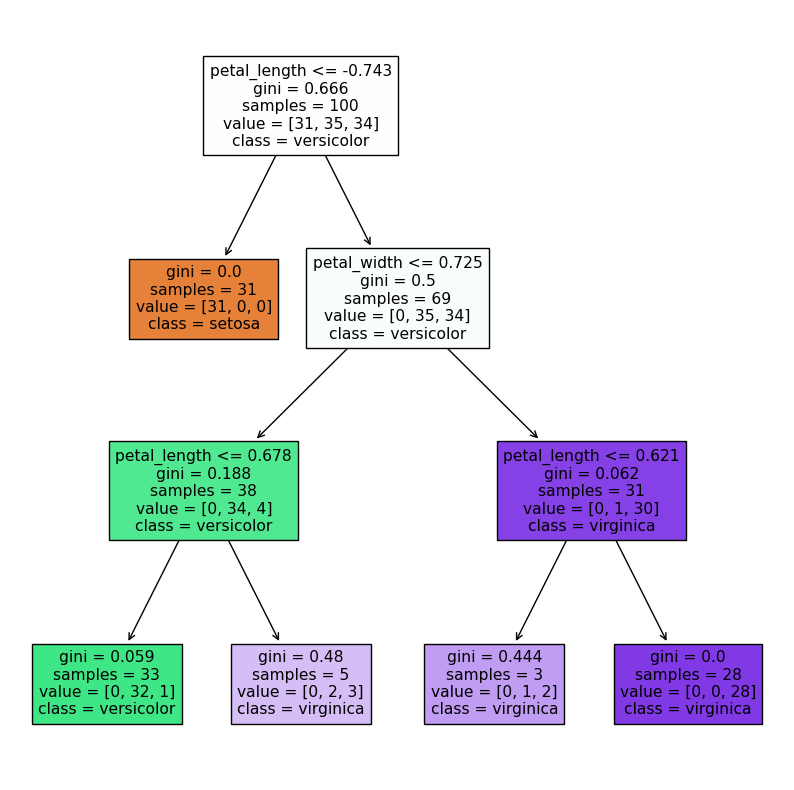

In [39]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(best_dtc, 
          feature_names=xtrain.columns, 
          class_names=best_dtc.classes_, 
          filled=True)
plt.show()

In [40]:
xtrain.shape

(100, 4)

In [41]:
ytrain.value_counts()

species   
versicolor    35
virginica     34
setosa        31
Name: count, dtype: int64

In [42]:
best_dtc.classes_


array(['setosa', 'versicolor', 'virginica'], dtype=object)

### Step 7: Out of sample prediction

In [43]:
xnew = pd.read_csv('iris_sample.csv')
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


In [45]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('scaler', StandardScaler())])

In [46]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.416010,-1.282963,0.137547,0.132510
1,1.280340,0.098217,0.762758,1.448832
2,-0.900681,-1.282963,-0.430828,-0.130755
3,-1.748856,-0.362176,0.000000,-1.315444
4,0.068662,-0.131979,0.762758,0.790671
5,-0.416010,1.019004,-1.397064,-1.315444
6,-0.294842,0.000000,-0.089803,0.132510
7,0.795669,-0.131979,0.819596,1.053935
8,-0.658345,1.479398,-1.283389,-1.315444
9,-0.900681,0.788808,-1.283389,0.000000


In [47]:
preds = best_dtc.predict(xnew_pre)
probs = best_dtc.predict_proba(xnew_pre)

In [48]:
preds

array(['versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica'],
      dtype=object)

In [49]:
best_dtc.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [50]:
probs

array([[0.        , 0.96969697, 0.03030303],
       [0.        , 0.        , 1.        ],
       [0.        , 0.96969697, 0.03030303],
       [0.        , 0.96969697, 0.03030303],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.96969697, 0.03030303],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.96969697, 0.03030303],
       [0.        , 0.96969697, 0.03030303],
       [0.        , 0.        , 1.        ],
       [0.        , 0.96969697, 0.03030303],
       [0.        , 0.4       , 0.6       ]])

In [51]:
import numpy as np
max_probs = np.max(probs, axis=1)
max_probs

array([0.96969697, 1.        , 0.96969697, 0.96969697, 1.        ,
       1.        , 0.96969697, 1.        , 1.        , 1.        ,
       0.96969697, 0.96969697, 1.        , 0.96969697, 0.6       ])

In [52]:
xnew['species_pred'] = preds 
xnew['probability'] = max_probs

In [53]:
xnew


,sepal_length,sepal_width,petal_length,petal_width,species_pred,probability
0,5.5,2.5,4.0,1.3,versicolor,0.969697
1,6.9,3.1,5.1,2.3,virginica,1.000000
2,5.1,2.5,3.0,1.1,versicolor,0.969697
3,4.4,2.9,NaN,0.2,versicolor,0.969697
4,5.9,3.0,5.1,1.8,virginica,1.000000
5,5.5,3.5,1.3,0.2,setosa,1.000000
6,5.6,NaN,3.6,1.3,versicolor,0.969697
7,6.5,3.0,5.2,2.0,virginica,1.000000
8,5.3,3.7,1.5,0.2,setosa,1.000000
9,5.1,3.4,1.5,NaN,setosa,1.000000


In [54]:
xnew.to_csv('results.csv',index=False)